# 데이터 분리

> **훈련(Training) / 검증(Validation) / 평가(Testing) 데이터로 분리(Split)**

<img src="https://github.com/ElaYJ/Study_Machine_Learning/assets/153154981/e2c2aec3-2bcb-4d42-8def-9272673a20fc" width="50%" height="50%">

In [1]:
import pandas as pd
from sklearn.datasets import load_iris

iris = load_iris()

</br>

### 🔰 데이터 선별

- `features` : 학습할 데이터로, 'petal length', 'petal width' 사용

- `labels` : 정답 데이터 ➡ **지도 학습(Supervised Learning)**

In [2]:
features = iris.data[:, 2:]
labels = iris.target

</br>

### 🔰 데이터를 훈련/테스트용으로 분리

- 훈련용 데이터와 테스트용 데이터를 8:2 비율로 분리한다.

- `train_test_split()` 함수

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=13)

In [4]:
X_train.shape, X_test.shape #--> 120:30 = 8:2

((120, 2), (30, 2))

</br>

### 🔰 데이터 분리 확인

- 데이터가 훈련용과 테스트용으로 잘 분리되었는지 확인한다.

- 데이터를 분리한 후 반드시 확인해야 할 것!!

	분리한 데이터 내에 3개의 품종이 몇 개씩 들어가 있는지 확인이 필요하다.

In [5]:
import numpy as np

np.unique(y_test, return_counts=True)

(array([0, 1, 2]), array([ 9,  8, 13], dtype=int64))

#### 👆 문제점. 

- 각 클래스(setosa[0], versicolor[1], verginica[2])별로 동일 비율이 아니다.

#### 📌 __stratify__

- stratify : 층을 이루다, 계층화하다.

- 테스트 데이터 30개가 3개의 품종 10개 씩으로 동일 비율을 맞추는 것이 좋다.

- 이럴 때 사용하는 옵션이 바로 `stratify`이다.

	이 옵션은 각각의 품종만을 모아서 8:2로 분리한다.

In [6]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, stratify=labels, random_state=13)
np.unique(y_test, return_counts=True)

(array([0, 1, 2]), array([10, 10, 10], dtype=int64))

</br>

### 🔰 분리한 훈련용 데이터로 결정트리(DT) 모델 생성

- 학습할 때마다 일관성을 유지하기 위해 `random_state`는 고정한다.

- 모델을 단순화시키기 위해(경계면의 수를 줄이기 위해) 성능을 제한한다. ➡ **규제**

	**규제**는 학습 데이터에 너무 최적화(**과적합**)되지 않도록 모델의 성능을 제한하는 것이다.

- 모델의 성능을 제한하기 위해 `max_depth`를 조정할 수 있다.

In [7]:
from sklearn.tree import DecisionTreeClassifier

iris_tree = DecisionTreeClassifier(max_depth=2, random_state=13)
iris_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=13)

#### ─▶ Decision Tree Model 구조 확인

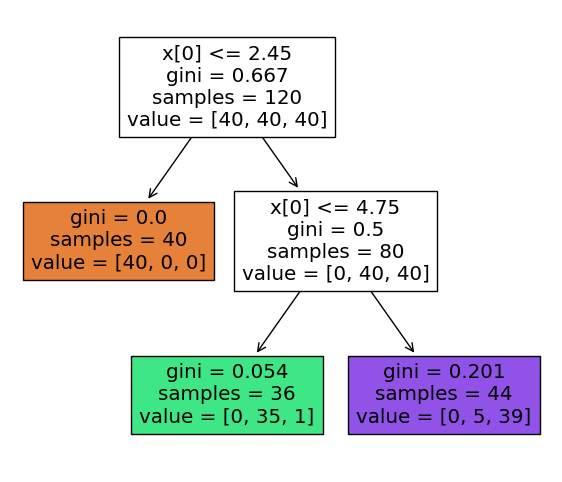

In [12]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# 위에서 만든 학습 모델의 Decision Tree 구조 확인
plt.figure(figsize=(7,6))
plot_tree(iris_tree, filled=True);

#### ─▶ Decision Tree Model 경계면 확인

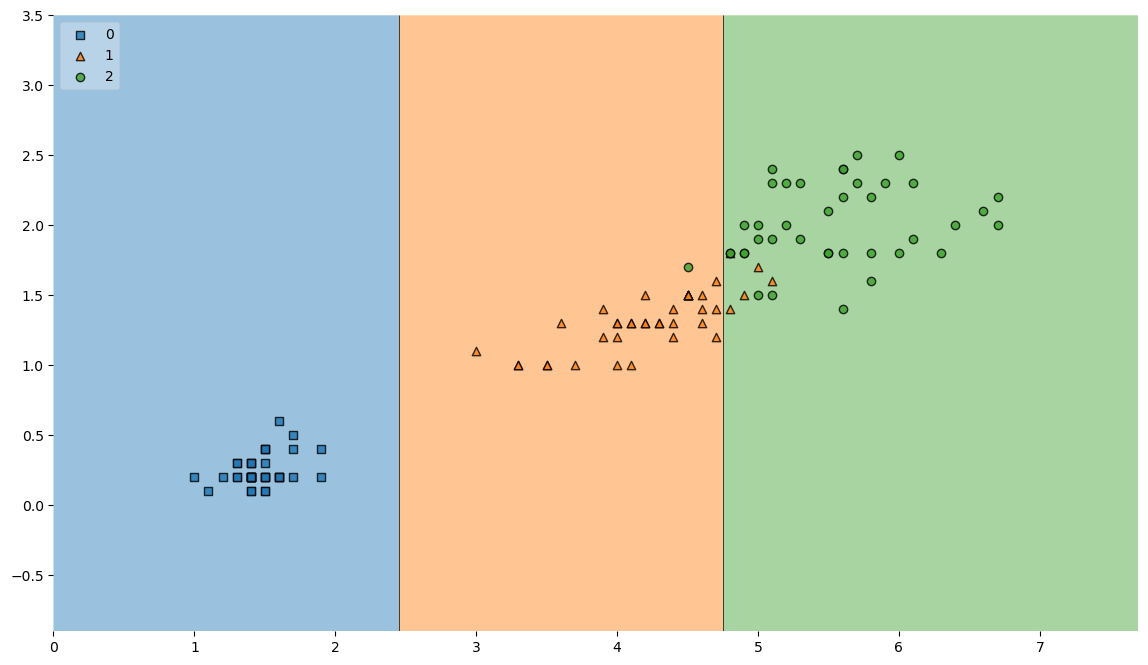

In [14]:
from mlxtend.plotting import plot_decision_regions

plt.figure(figsize=(14,8))
plot_decision_regions(X=X_train, y=y_train, clf=iris_tree, legend=2)
plt.show()

#### ─▶ Train Data에 대한 Accuracy 확인

In [9]:
from sklearn.metrics import accuracy_score

y_pred_tree = iris_tree.predict(X_train)
accuracy_score(y_train, y_pred_tree) #--> 정확도가 데이터를 나누기 전보다 감소하였다.

0.95

#### ─▶ Test Data에 대한 Accuracy 확인

In [13]:
y_pred_test = iris_tree.predict(X_test)
accuracy_score(y_test, y_pred_test) #--> 모델의 정확도보다 높으므로 과적합은 아니라고 말할 수 있다.

0.9666666666666667

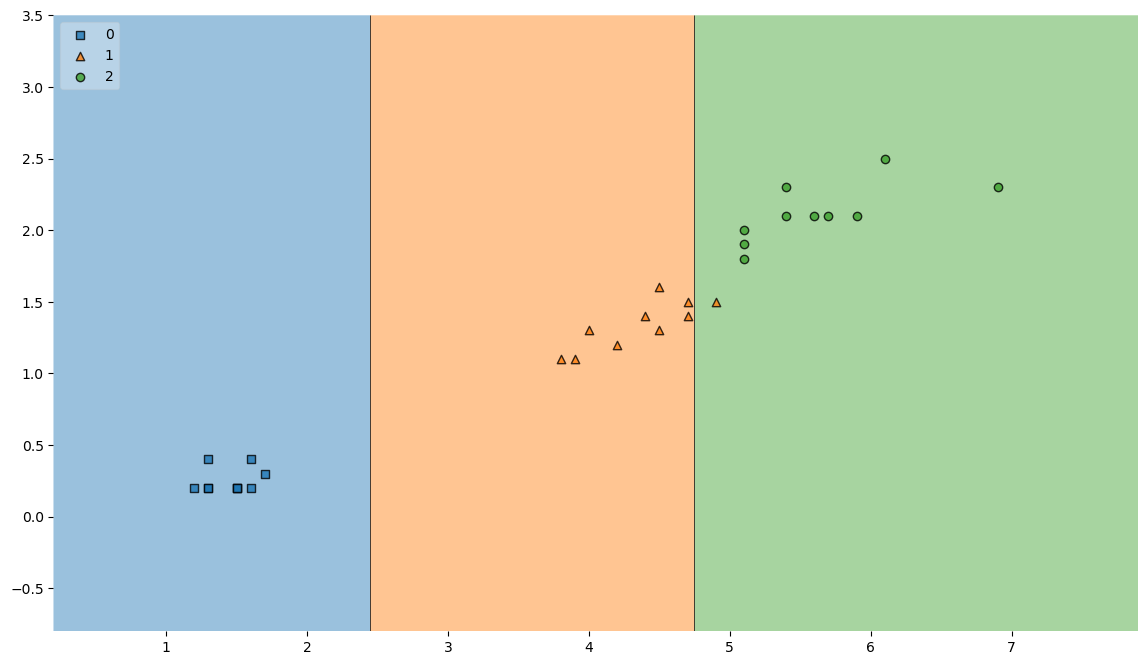

In [15]:
plt.figure(figsize=(14,8))
plot_decision_regions(X=X_test, y=y_test, clf=iris_tree, legend=2)
plt.show()

#### ─▶ 잔기술 하나

- 전체 데이터 중 테스트 데이터로 사용된 것들을 보여준다.

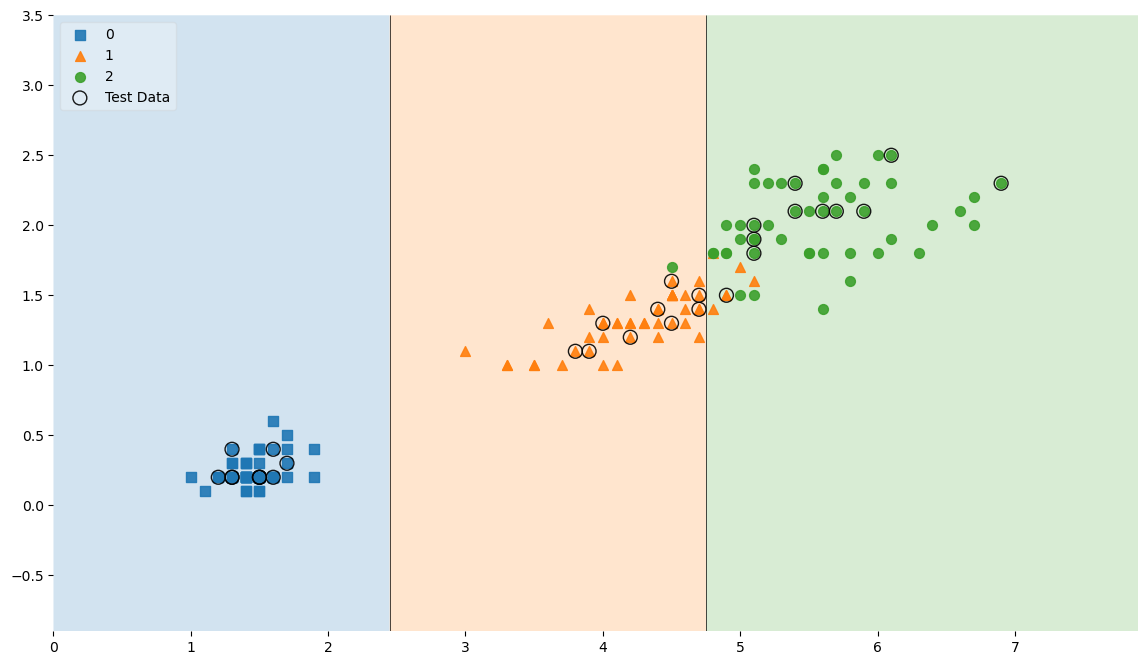

In [20]:
scatter_highlight_kwargs = {'s':100, 'label':'Test Data', 'alpha':0.9}
scatter_kwargs = {'s':50, 'edgecolor':None, 'alpha':0.9}

plt.figure(figsize=(14,8))
plot_decision_regions(
	X=features, y=labels, clf=iris_tree, legend=2,
 	X_highlight=X_test,
	scatter_highlight_kwargs=scatter_highlight_kwargs,
	scatter_kwargs=scatter_kwargs,
	contourf_kwargs={'alpha':0.2}
)
plt.show()

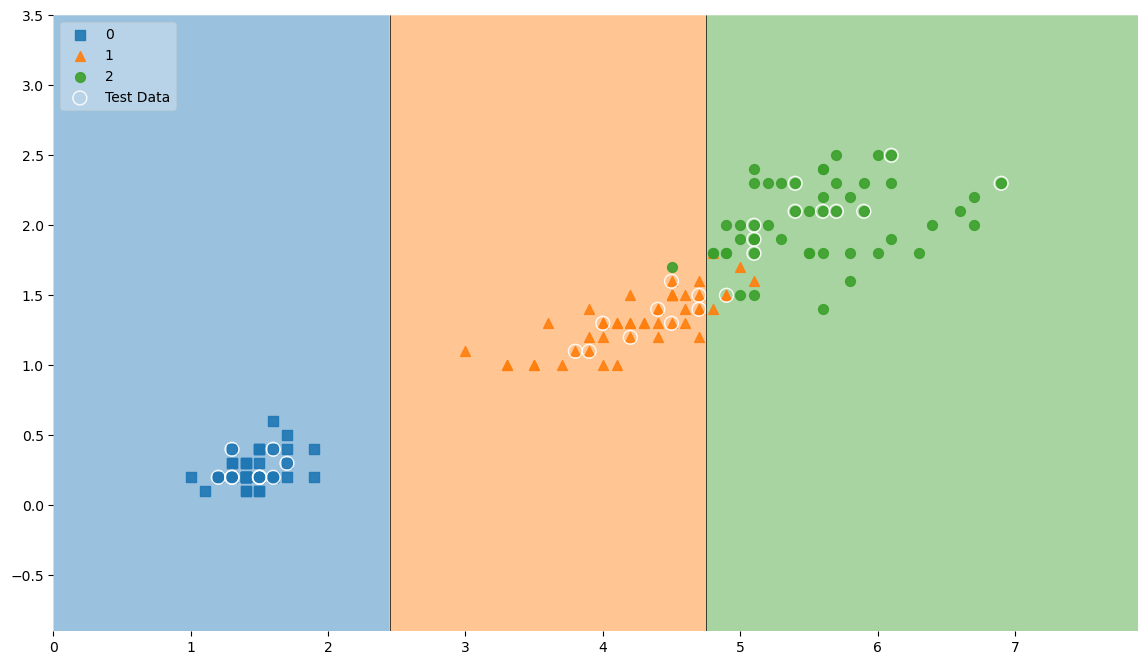

In [23]:
plt.figure(figsize=(14,8))
plot_decision_regions(
	X=features, y=labels, clf=iris_tree, legend=2,
 	X_highlight=X_test,
	scatter_highlight_kwargs={'s':100, 'label':'Test Data', 'alpha':0.9, 'edgecolor':'white'},
	scatter_kwargs={'s':50, 'edgecolor':None, 'alpha':0.9},
	# contourf_kwargs={'alpha':0.2}
)
plt.show()

</br>

### 🔰 전체 데이터 사용

- 데이터 선별을 하지 않고 feature 4개('sepal length', 'sepal width', 'petal length', 'petal width')를 모두 사용해 모델을 만든다.

In [30]:
iris['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [31]:
features = iris.data
labels = iris.target

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, stratify=labels, random_state=13)

iris_tree = DecisionTreeClassifier(max_depth=2, random_state=13)
iris_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=13)

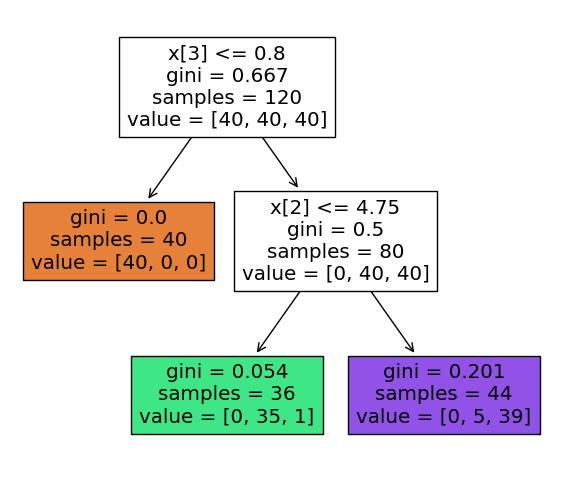

In [26]:
plt.figure(figsize=(7,6))
plot_tree(iris_tree, filled=True); #--> 전체 특성을 모두 사용한 결정트리 모델 구조

### 📍 __실제 사례를 모델에 적용__

- 길다가 주운 Iris의 feature 정보 [4.3, 2.0, 1.2, 1.0]를 모델에 적용 시켜 본다.

- 데이터의 형태는 행렬 연산이 가능한 형태로 만들어 인수로 넘겨주어야 한다.

In [34]:
np.array([4.3, 2.0, 1.2, 1.0]).shape

(4,)

In [35]:
np.array([[4.3, 2.0, 1.2, 1.0]]).shape #--> matrix 연산이 가능하도록 shape을 만들어 주기위해 대괄호를 2개 썼다.

(1, 4)

In [36]:
test_data = np.array([[4.3, 2.0, 1.2, 1.0]])
y_pred_data = iris_tree.predict(test_data)
y_pred_data 

array([1])

In [37]:
iris.target_names[y_pred_data]

array(['versicolor'], dtype='<U10')

#### ─▶ Result

In [39]:
print(f"{y_pred_data[0]}번 품종, \'{iris.target_names[y_pred_data][0]}\'이다.")

1번 품종, 'versicolor'이다.


#### ─▶ Species 예측 확률

In [30]:
iris_tree.predict_proba(test_data) #--> 내가 훈련시킨 모델에 의해 도출되는 품종 예측 확률

array([[0.        , 0.97222222, 0.02777778]])

#### ─▶ feature의 중요도

In [40]:
"""
# max_depth=2인 모델에서 feature의 중요도
# ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
"""
iris_tree.feature_importances_

array([0.        , 0.        , 0.42189781, 0.57810219])

In [41]:
"""
# 만약 max_depth=5라면...

💡 depth가 커지면서 Split(분기)에서 feature 'sepal width'도 사용되고 있음을 알 수 있다.
"""

iris_tree = DecisionTreeClassifier(max_depth=5, random_state=13)
iris_tree.fit(X_train, y_train)

dict(zip(iris.feature_names, iris_tree.feature_importances_))

{'sepal length (cm)': 0.0,
 'sepal width (cm)': 0.033898305084745756,
 'petal length (cm)': 0.3958012326656394,
 'petal width (cm)': 0.5703004622496148}